In [1]:
ApiKey= "your api key"
from coinmarketcapapi import CoinMarketCapAPI, CoinMarketCapAPIError
cmc = CoinMarketCapAPI(ApiKey)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import json
from IPython.core.display import HTML
import requests

### How to get the ID Map data with CoinMarketCap API?

The CMC ID Map endpoint obtains a mapping of all currencies with their unique ID’s. Each currency obtained by this endpoint will return standard identifiers as name, symbol and token address.

The data obtained will provide the first and last historical data timestamps

In [3]:
data_id_map= cmc.cryptocurrency_map()


Make the data more readable by putting it into a pandas data frame. For this, you need to do the following:

In [4]:
data_id_map_pd = pd.DataFrame(data_id_map.data, columns =['name','symbol'])
#pd.set_index('symbol',inplace=True)
print(data_id_map_pd)

               name    symbol
0           Bitcoin       BTC
1          Litecoin       LTC
2          Namecoin       NMC
3         Terracoin       TRC
4          Peercoin       PPC
...             ...       ...
7850     MadCredits       MWR
7851  FireFlame Inu      FIRE
7852       ImpactXP  IMPACTXP
7853       Juicebox       JBX
7854    Kardia Info      INFO

[7855 rows x 2 columns]


### How to get quote data using CoinMarketCap API?
The CMC quote data endpoint returns the latest market quote for a specified cryptocurrency. Moreover, we can convert this data easily into a wanted currency.

In [5]:
data_quote = cmc.cryptocurrency_quotes_latest(symbol='ETH', convert='USD')
data_quote.data

##By using url
#var url=https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest?symbol=ETH

{'ETH': {'id': 1027,
  'name': 'Ethereum',
  'symbol': 'ETH',
  'slug': 'ethereum',
  'num_market_pairs': 4672,
  'date_added': '2015-08-07T00:00:00.000Z',
  'tags': ['mineable',
   'pow',
   'smart-contracts',
   'ethereum-ecosystem',
   'binance-smart-chain',
   'coinbase-ventures-portfolio',
   'three-arrows-capital-portfolio',
   'polychain-capital-portfolio',
   'binance-labs-portfolio',
   'blockchain-capital-portfolio',
   'boostvc-portfolio',
   'cms-holdings-portfolio',
   'dcg-portfolio',
   'dragonfly-capital-portfolio',
   'electric-capital-portfolio',
   'fabric-ventures-portfolio',
   'framework-ventures-portfolio',
   'hashkey-capital-portfolio',
   'kinetic-capital-portfolio',
   'huobi-capital-portfolio',
   'alameda-research-portfolio',
   'a16z-portfolio',
   '1confirmation-portfolio',
   'winklevoss-capital-portfolio',
   'usv-portfolio',
   'placeholder-ventures-portfolio',
   'pantera-capital-portfolio',
   'multicoin-capital-portfolio',
   'paradigm-portfolio'],


Make the data more readable by json normalizing

In [6]:
jsondata= pd.json_normalize(data_quote.data)
jsondata.T
#data_quote_pd= pd.DataFrame(data_quote.data['ETH'],columns=data_quote.data['ETH'].keys())

,0
ETH.id,1027
ETH.name,Ethereum
ETH.symbol,ETH
ETH.slug,ethereum
ETH.num_market_pairs,4672
ETH.date_added,2015-08-07T00:00:00.000Z
ETH.tags,"[mineable, pow, smart-contracts, ethereum-ecos..."
ETH.max_supply,None
ETH.circulating_supply,118561627.749
ETH.total_supply,118561627.749


### How to get the latest listing data using CoinMarketCap API

The CMC latest listings endpoint obtains a list of all active cryptocurrencies with their latest market data.



In [7]:
data_latest = cmc.cryptocurrency_listings_latest()
data_latest.data[0]
#url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

{'id': 1,
 'name': 'Bitcoin',
 'symbol': 'BTC',
 'slug': 'bitcoin',
 'num_market_pairs': 8311,
 'date_added': '2013-04-28T00:00:00.000Z',
 'tags': ['mineable',
  'pow',
  'sha-256',
  'store-of-value',
  'state-channel',
  'coinbase-ventures-portfolio',
  'three-arrows-capital-portfolio',
  'polychain-capital-portfolio',
  'binance-labs-portfolio',
  'blockchain-capital-portfolio',
  'boostvc-portfolio',
  'cms-holdings-portfolio',
  'dcg-portfolio',
  'dragonfly-capital-portfolio',
  'electric-capital-portfolio',
  'fabric-ventures-portfolio',
  'framework-ventures-portfolio',
  'galaxy-digital-portfolio',
  'huobi-capital-portfolio',
  'alameda-research-portfolio',
  'a16z-portfolio',
  '1confirmation-portfolio',
  'winklevoss-capital-portfolio',
  'usv-portfolio',
  'placeholder-ventures-portfolio',
  'pantera-capital-portfolio',
  'multicoin-capital-portfolio',
  'paradigm-portfolio'],
 'max_supply': 21000000,
 'circulating_supply': 18887950,
 'total_supply': 18887950,
 'platform':

#### Creating lists for some data points

In [8]:
names= [i['name'] for i in data_latest.data]
#names
symbols= [i['symbol'] for i in data_latest.data]
#symbols
#slugs= [i['slug'] for i in data_latest.data]
#slug
#num_market_pairs= [i['num_market_pairs'] for i in data_latest.data]
#num_market_pairs
date_added= [i['date_added'] for i in data_latest.data]
#date_added
cmc_ranks= [i['cmc_rank'] for i in data_latest.data]
#cmc_ranks
total_supply= [i['total_supply'] for i in data_latest.data]
#cmc_ranks
last_updated= [i['last_updated'] for i in data_latest.data]
#cmc_ranks
quote_prices=[i['quote']['USD']['price'] for i in data_latest.data]

volume_24h=[i['quote']['USD']['volume_24h'] for i in data_latest.data]

volume_change_1h=[i['quote']['USD']['percent_change_1h'] for i in data_latest.data]

volume_change_24h=[i['quote']['USD']['percent_change_24h'] for i in data_latest.data]

volume_change_7d=[i['quote']['USD']['percent_change_7d'] for i in data_latest.data]

volume_change_30d=[i['quote']['USD']['percent_change_30d'] for i in data_latest.data]

volume_change_60d=[i['quote']['USD']['percent_change_60d'] for i in data_latest.data]

volume_change_90d=[i['quote']['USD']['percent_change_90d'] for i in data_latest.data]

market_cap=[i['quote']['USD']['market_cap'] for i in data_latest.data]

market_cap_dominance = [i['quote']['USD']['market_cap_dominance'] for i in data_latest.data]

#### Creating dataFrame from the selected lists

In [9]:
df= pd.DataFrame({'name':names,'symbol':symbols,'date_added':date_added,
                 'cmc_rank':cmc_ranks,'total_supply':total_supply,'last_updated':last_updated,'price':quote_prices,'volume_24h':volume_24h,
                  'volume_change_1h':volume_change_1h,'volume_change_24h':volume_change_24h,'volume_change_7d':volume_change_7d,
                 'volume_change_30d':volume_change_30d,'volume_change_60d':volume_change_60d,'volume_change_90d':volume_change_90d,
                 'market_cap':market_cap,'market_cap_dominance':market_cap_dominance})
df

,name,symbol,date_added,cmc_rank,total_supply,last_updated,price,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d,market_cap,market_cap_dominance
0,Bitcoin,BTC,2013-04-28T00:00:00.000Z,1,1.888795e+07,2021-12-01T11:17:02.000Z,56889.203959,3.655256e+10,-0.320473,-0.283872,0.680937,-8.471585,19.657813,14.141988,1.074520e+12,40.5206
1,Ethereum,ETH,2015-08-07T00:00:00.000Z,2,1.185616e+08,2021-12-01T11:17:03.000Z,4714.449411,3.009718e+10,-0.262828,5.005474,10.312498,8.613902,43.928827,25.821647,5.589528e+11,21.1052
2,Binance Coin,BNB,2017-07-25T00:00:00.000Z,3,1.668011e+08,2021-12-01T11:16:14.000Z,639.154939,3.056017e+09,-0.800184,3.541923,8.601267,18.608157,51.825271,30.454581,1.066118e+11,4.0255
3,Tether,USDT,2015-02-25T00:00:00.000Z,4,7.635200e+10,2021-12-01T11:16:13.000Z,1.001195,8.634921e+10,0.048000,0.047348,0.115300,0.086172,0.090947,0.079256,7.366628e+10,2.7805
4,Solana,SOL,2020-04-10T00:00:00.000Z,5,5.102060e+08,2021-12-01T11:17:06.000Z,222.585300,3.444402e+09,0.596154,9.658946,3.286683,8.090880,41.023806,93.689039,6.808058e+10,2.5697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,OMG Network,OMG,2017-07-14T00:00:00.000Z,96,1.402454e+08,2021-12-01T11:16:14.000Z,8.443793,6.062446e+08,-1.329373,-4.093854,-4.398144,-40.614888,-40.281050,26.109984,1.184203e+09,0.0447
96,Siacoin,SC,2015-08-26T00:00:00.000Z,97,4.944728e+10,2021-12-01T11:17:03.000Z,0.022724,8.138431e+07,-0.892767,-5.297979,12.742627,13.850236,43.611445,8.071703,1.123646e+09,0.0424
97,Livepeer,LPT,2018-12-19T00:00:00.000Z,98,2.285901e+07,2021-12-01T11:16:10.000Z,52.703042,4.881504e+07,0.656295,0.677086,10.124858,98.631923,197.868083,145.362496,1.115442e+09,0.0421
98,Ravencoin,RVN,2018-03-10T00:00:00.000Z,99,1.020540e+10,2021-12-01T11:16:11.000Z,0.108306,5.055722e+07,-0.290030,-0.820826,-4.138629,-11.425299,-2.261356,-20.293872,1.105306e+09,0.0417


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  100 non-null    object 
 1   symbol                100 non-null    object 
 2   date_added            100 non-null    object 
 3   cmc_rank              100 non-null    int64  
 4   total_supply          100 non-null    float64
 5   last_updated          100 non-null    object 
 6   price                 100 non-null    float64
 7   volume_24h            100 non-null    float64
 8   volume_change_1h      100 non-null    float64
 9   volume_change_24h     100 non-null    float64
 10  volume_change_7d      100 non-null    float64
 11  volume_change_30d     100 non-null    float64
 12  volume_change_60d     100 non-null    float64
 13  volume_change_90d     100 non-null    float64
 14  market_cap            100 non-null    float64
 15  market_cap_dominance  10

In [11]:
print("\nMissing Values", df.isnull().any())
print("\nUnique Values ", df.nunique())


Missing Values name                    False
symbol                  False
date_added              False
cmc_rank                False
total_supply            False
last_updated            False
price                   False
volume_24h              False
volume_change_1h        False
volume_change_24h       False
volume_change_7d        False
volume_change_30d       False
volume_change_60d       False
volume_change_90d       False
market_cap              False
market_cap_dominance    False
dtype: bool

Unique Values  name                    100
symbol                  100
date_added               98
cmc_rank                100
total_supply             91
last_updated             17
price                   100
volume_24h              100
volume_change_1h        100
volume_change_24h       100
volume_change_7d        100
volume_change_30d       100
volume_change_60d       100
volume_change_90d       100
market_cap              100
market_cap_dominance     97
dtype: int64


In [12]:
df.describe()

,cmc_rank,total_supply,price,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d,market_cap,market_cap_dominance
count,100.000000,1.000000e+02,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000
mean,50.500000,6.109021e+12,1817.136316,2.252642e+09,-0.354924,1.423032,0.674012,17.271164,64.044558,80.616865,2.558747e+10,0.965484
std,29.011492,5.898258e+13,9634.041668,9.745027e+09,0.830895,5.224438,12.687123,76.591791,156.529671,322.906852,1.204634e+11,4.543972
min,1.000000,1.125010e+05,0.000046,2.925052e+06,-2.392509,-10.401927,-24.494966,-40.614888,-40.281050,-50.522809,1.086972e+09,0.041000
25%,25.750000,1.601622e+08,1.000343,9.071181e+07,-0.715704,-1.148055,-4.964652,-13.906889,-2.489876,-15.580476,2.000608e+09,0.075525
50%,50.500000,1.000000e+09,5.239709,2.582997e+08,-0.352777,0.258426,-1.029995,-3.632044,13.745022,5.069602,3.827882e+09,0.144500
75%,75.250000,9.719593e+09,53.024276,7.856232e+08,-0.039790,3.368079,4.574366,15.156283,52.756460,47.597815,7.807178e+09,0.294775
max,100.000000,5.897366e+14,56889.203959,8.634921e+10,3.507844,27.198723,49.722244,563.679802,880.004184,2296.875329,1.074520e+12,40.520600


In [13]:
df["date_added"]=pd.to_datetime(df["date_added"]).dt.tz_localize(None)
df["last_updated"]=pd.to_datetime(df["last_updated"]).dt.tz_localize(None)

In [14]:
df.set_index('symbol',inplace=True)


In [15]:
df

,name,date_added,cmc_rank,total_supply,last_updated,price,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d,market_cap,market_cap_dominance
symbol,,,,,,,,,,,,,,,
BTC,Bitcoin,2013-04-28,1,1.888795e+07,2021-12-01 11:17:02,56889.203959,3.655256e+10,-0.320473,-0.283872,0.680937,-8.471585,19.657813,14.141988,1.074520e+12,40.5206
ETH,Ethereum,2015-08-07,2,1.185616e+08,2021-12-01 11:17:03,4714.449411,3.009718e+10,-0.262828,5.005474,10.312498,8.613902,43.928827,25.821647,5.589528e+11,21.1052
BNB,Binance Coin,2017-07-25,3,1.668011e+08,2021-12-01 11:16:14,639.154939,3.056017e+09,-0.800184,3.541923,8.601267,18.608157,51.825271,30.454581,1.066118e+11,4.0255
USDT,Tether,2015-02-25,4,7.635200e+10,2021-12-01 11:16:13,1.001195,8.634921e+10,0.048000,0.047348,0.115300,0.086172,0.090947,0.079256,7.366628e+10,2.7805
SOL,Solana,2020-04-10,5,5.102060e+08,2021-12-01 11:17:06,222.585300,3.444402e+09,0.596154,9.658946,3.286683,8.090880,41.023806,93.689039,6.808058e+10,2.5697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OMG,OMG Network,2017-07-14,96,1.402454e+08,2021-12-01 11:16:14,8.443793,6.062446e+08,-1.329373,-4.093854,-4.398144,-40.614888,-40.281050,26.109984,1.184203e+09,0.0447
SC,Siacoin,2015-08-26,97,4.944728e+10,2021-12-01 11:17:03,0.022724,8.138431e+07,-0.892767,-5.297979,12.742627,13.850236,43.611445,8.071703,1.123646e+09,0.0424
LPT,Livepeer,2018-12-19,98,2.285901e+07,2021-12-01 11:16:10,52.703042,4.881504e+07,0.656295,0.677086,10.124858,98.631923,197.868083,145.362496,1.115442e+09,0.0421


In [16]:
# Selecting the 'id' and the 'market_cap' columns
market_cap_raw = df[["name","market_cap"]]
# Counting the number of values
print(market_cap_raw.count())


name          100
market_cap    100
dtype: int64


#### How big is Bitcoin compared with the rest of the cryptocurrencies?

In [17]:
# Selecting the first 10 rows and setting the index
cap10 = df.head(10)
cap10 = cap10.set_index("name" )
cap10.head(5)

,date_added,cmc_rank,total_supply,last_updated,price,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d,market_cap,market_cap_dominance
name,,,,,,,,,,,,,,
Bitcoin,2013-04-28,1,1.888795e+07,2021-12-01 11:17:02,56889.203959,3.655256e+10,-0.320473,-0.283872,0.680937,-8.471585,19.657813,14.141988,1.074520e+12,40.5206
Ethereum,2015-08-07,2,1.185616e+08,2021-12-01 11:17:03,4714.449411,3.009718e+10,-0.262828,5.005474,10.312498,8.613902,43.928827,25.821647,5.589528e+11,21.1052
Binance Coin,2017-07-25,3,1.668011e+08,2021-12-01 11:16:14,639.154939,3.056017e+09,-0.800184,3.541923,8.601267,18.608157,51.825271,30.454581,1.066118e+11,4.0255
Tether,2015-02-25,4,7.635200e+10,2021-12-01 11:16:13,1.001195,8.634921e+10,0.048000,0.047348,0.115300,0.086172,0.090947,0.079256,7.366628e+10,2.7805
Solana,2020-04-10,5,5.102060e+08,2021-12-01 11:17:06,222.585300,3.444402e+09,0.596154,9.658946,3.286683,8.090880,41.023806,93.689039,6.808058e+10,2.5697


In [18]:
sym_list1 = ','.join(symbols)

In [19]:
data1 = cmc.cryptocurrency_info(symbol=sym_list1)

In [20]:
data1.data['BTC']

{'id': 1,
 'name': 'Bitcoin',
 'symbol': 'BTC',
 'category': 'coin',
 'description': 'Bitcoin (BTC) is a cryptocurrency . Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 18,887,950. The last known price of Bitcoin is 57,020.23008684 USD and is down -0.20 over the last 24 hours. It is currently trading on 8310 active market(s) with $36,589,636,176.79 traded over the last 24 hours. More information can be found at https://bitcoin.org/.',
 'slug': 'bitcoin',
 'logo': 'https://s2.coinmarketcap.com/static/img/coins/64x64/1.png',
 'subreddit': 'bitcoin',
 'notice': '',
 'tags': ['mineable',
  'pow',
  'sha-256',
  'store-of-value',
  'state-channel',
  'coinbase-ventures-portfolio',
  'three-arrows-capital-portfolio',
  'polychain-capital-portfolio',
  'binance-labs-portfolio',
  'blockchain-capital-portfolio',
  'boostvc-portfolio',
  'cms-holdings-portfolio',
  'dcg-portfolio',
  'dragonfly-capital-portfolio',
  'electric-capital-portfolio',
  

In [21]:
df2 = pd.DataFrame(data1.data).T
df2

,id,name,symbol,category,description,slug,logo,subreddit,notice,tags,...,tag-groups,urls,platform,date_added,twitter_username,is_hidden,date_launched,contract_address,self_reported_circulating_supply,self_reported_tags
AAVE,7278,Aave,AAVE,token,Aave (AAVE) is a cryptocurrency and operates o...,aave,https://s2.coinmarketcap.com/static/img/coins/...,Aave_Official,[LEND](https://coinmarketcap.com/currencies/aa...,"[defi, dao, yield-farming, binance-smart-chain...",...,"[PROPERTY, PROPERTY, PROPERTY, PROPERTY, PROPE...","{'website': ['https://aave.com/', 'https://eth...","{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",2020-10-02T00:00:00.000Z,AaveAave,0,None,[{'contract_address': '0x7Fc66500c84A76Ad7e9c9...,None,None
ADA,2010,Cardano,ADA,coin,Cardano (ADA) is a cryptocurrency launched in ...,cardano,https://s2.coinmarketcap.com/static/img/coins/...,cardano,,"[mineable, dpos, pos, platform, research, smar...",...,"[OTHER, CONSENSUS_ALGORITHM, CONSENSUS_ALGORIT...","{'website': ['https://www.cardano.org'], 'twit...",None,2017-10-01T00:00:00.000Z,cardano,0,2017-09-01T00:00:00.000Z,[{'contract_address': '0x3ee2200efb3400fabb9aa...,None,[Communications & Social Media]
ALGO,4030,Algorand,ALGO,coin,Algorand (ALGO) is a cryptocurrency . Algorand...,algorand,https://s2.coinmarketcap.com/static/img/coins/...,AlgorandOfficial,,"[pos, platform, research, smart-contracts, arr...",...,"[CONSENSUS_ALGORITHM, PROPERTY, PROPERTY, PROP...","{'website': ['http://algorand.foundation', 'ht...",None,2019-06-20T00:00:00.000Z,AlgoFoundation,0,None,[],None,None
AMP,6945,Amp,AMP,token,Amp (AMP) is a cryptocurrency launched in 2020...,amp,https://s2.coinmarketcap.com/static/img/coins/...,amptoken,,None,...,None,"{'website': ['https://amptoken.org'], 'twitter...","{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",2020-09-08T00:00:00.000Z,amptoken,0,2020-09-08T00:00:00.000Z,[{'contract_address': '0xff20817765cb7f73d4bde...,36271610691,None
ANKR,3783,Ankr,ANKR,token,Ankr (ANKR) is a cryptocurrency and operates o...,ankr,https://s2.coinmarketcap.com/static/img/coins/...,,,"[platform, enterprise-solutions, defi, filesha...",...,"[PROPERTY, PROPERTY, PROPERTY, PROPERTY, PROPE...","{'website': ['https://www.ankr.com/'], 'twitte...","{'id': 1839, 'name': 'Binance Chain (BEP2)', '...",2019-03-06T00:00:00.000Z,ankr,0,None,[{'contract_address': '0x8290333cef9e6d528dd56...,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XMR,328,Monero,XMR,coin,Monero (XMR) is a cryptocurrency . Users are a...,monero,https://s2.coinmarketcap.com/static/img/coins/...,monero,,"[mineable, pow, medium-of-exchange, privacy, r...",...,"[OTHER, CONSENSUS_ALGORITHM, PROPERTY, PROPERT...","{'website': ['https://www.getmonero.org/'], 't...",None,2014-05-21T00:00:00.000Z,monero,0,None,[{'contract_address': 'secret19ungtd2c7srftqdw...,None,None
XRP,52,XRP,XRP,coin,XRP (XRP) is a cryptocurrency . XRP has a curr...,xrp,https://s2.coinmarketcap.com/static/img/coins/...,ripple,,"[medium-of-exchange, enterprise-solutions, bin...",...,"[PROPERTY, PROPERTY, PLATFORM, PROPERTY, PROPE...","{'website': ['https://xrpl.org/'], 'twitter': ...",None,2013-08-04T00:00:00.000Z,Ripple,0,None,[{'contract_address': '0x1d2f0da169ceb9fc7b314...,None,None
XTZ,2011,Tezos,XTZ,coin,Tezos (XTZ) is a cryptocurrency . Tezos has a ...,tezos,https://s2.coinmarketcap.com/static/img/coins/...,tezos,,"[pos, platform, enterprise-solutions, collecti...",...,"[CONSENSUS_ALGORITHM, PROPERTY, PROPERTY, PROP...","{'website': ['https://www.tezos.com/'], 'twitt...",None,2017-10-06T00:00:00.000Z,tezos,0,None,[{'contract_address': '0x16939ef78684453bfdfb4...,None,None
ZEC,1437,Zcash,ZEC,coin,Zcash (ZEC) is a cryptocurrency . Users are ab...,zcash,https://s2.coinmarketcap.com/static/img/coins/...,zec,,"[mineable, pow, equihash, medium-of-exchange, ...",...,"[OTHER, CONSENSUS_ALGORITHM, CONSENSUS_ALGORIT...","{'website': ['https://z.cash/'], 'twitter': ['...",None,2016-10-29T00:00:00.000Z,

In [22]:
df2['name']

AAVE        Aave
ADA      Cardano
ALGO    Algorand
AMP          Amp
ANKR        Ankr
          ...   
XMR       Monero
XRP          XRP
XTZ        Tezos
ZEC        Zcash
ZEN      Horizen
Name: name, Length: 100, dtype: object

In [23]:
df2 = df2[['id','name','description','logo','urls','twitter_username']]

In [24]:
df2['urls'] = df2['urls'].apply(lambda x : x['website'][0])

<ipython-input-24-081e8829ff0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['urls'] = df2['urls'].apply(lambda x : x['website'][0])


In [25]:
df2['urls']

AAVE             https://aave.com/
ADA        https://www.cardano.org
ALGO    http://algorand.foundation
AMP           https://amptoken.org
ANKR         https://www.ankr.com/
                   ...            
XMR     https://www.getmonero.org/
XRP              https://xrpl.org/
XTZ         https://www.tezos.com/
ZEC                https://z.cash/
ZEN        https://www.horizen.io/
Name: urls, Length: 100, dtype: object

In [26]:
df = df.merge(df2,on='name')

In [27]:
def image_to_html(link):
    return '<img src='+link+'>'
df1 = HTML(df.to_html(escape=False,formatters=dict(logo=image_to_html)))

In [28]:
df

,name,date_added,cmc_rank,total_supply,last_updated,price,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d,market_cap,market_cap_dominance,id,description,logo,urls,twitter_username
0,Bitcoin,2013-04-28,1,1.888795e+07,2021-12-01 11:17:02,56889.203959,3.655256e+10,-0.320473,-0.283872,0.680937,-8.471585,19.657813,14.141988,1.074520e+12,40.5206,1,Bitcoin (BTC) is a cryptocurrency . Users are ...,https://s2.coinmarketcap.com/static/img/coins/...,https://bitcoin.org/,
1,Ethereum,2015-08-07,2,1.185616e+08,2021-12-01 11:17:03,4714.449411,3.009718e+10,-0.262828,5.005474,10.312498,8.613902,43.928827,25.821647,5.589528e+11,21.1052,1027,Ethereum (ETH) is a cryptocurrency . Users are...,https://s2.coinmarketcap.com/static/img/coins/...,https://www.ethereum.org/,ethereum
2,Binance Coin,2017-07-25,3,1.668011e+08,2021-12-01 11:16:14,639.154939,3.056017e+09,-0.800184,3.541923,8.601267,18.608157,51.825271,30.454581,1.066118e+11,4.0255,1839,Binance Coin (BNB) is a cryptocurrency . Binan...,https://s2.coinmarketcap.com/static/img/coins/...,https://www.binance.com/,binance
3,Tether,2015-02-25,4,7.635200e+10,2021-12-01 11:16:13,1.001195,8.634921e+10,0.048000,0.047348,0.115300,0.086172,0.090947,0.079256,7.366628e+10,2.7805,825,Tether (USDT) is a cryptocurrency and operates...,https://s2.coinmarketcap.com/static/img/coins/...,https://tether.to,tether_to
4,Solana,2020-04-10,5,5.102060e+08,2021-12-01 11:17:06,222.585300,3.444402e+09,0.596154,9.658946,3.286683,8.090880,41.023806,93.689039,6.808058e+10,2.5697,5426,Solana (SOL) is a cryptocurrency launched in 2...,https://s2.coinmarketcap.com/static/img/coins/...,https://solana.com,solana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,OMG Network,2017-07-14,96,1.402454e+08,2021-12-01 11:16:14,8.443793,6.062446e+08,-1.329373,-4.093854,-4.398144,-40.614888,-40.281050,26.109984,1.184203e+09,0.0447,1808,OMG Network (OMG) is a cryptocurrency . OMG Ne...,https://s2.coinmarketcap.com/static/img/coins/...,https://omg.network/,omgnetworkhq
96,Siacoin,2015-08-26,97,4.944728e+10,2021-12-01 11:17:03,0.022724,8.138431e+07,-0.892767,-5.297979,12.742627,13.850236,43.611445,8.071703,1.123646e+09,0.0424,1042,Siacoin (SC) is a cryptocurrency . Users are a...,https://s2.coinmarketcap.com/static/img/coins/...,https://sia.tech/,SkynetLabs
97,Livepeer,2018-12-19,98,2.285901e+07,2021-12-01 11:16:10,52.703042,4.881504e+07,0.656295,0.677086,10.124858,98.631923,197.868083,145.362496,1.115442e+09,0.0421,3640,Livepeer (LPT) is a cryptocurrency . Livepeer ...,https://s2.coinmarketcap.com/static/img/coins/...,https://livepeer.org/,LivepeerOrg
98,Ravencoin,2018-03-10,99,1.020540e+10,2021-12-01 11:16:11,0.108306,5.055722e+07,-0.290030,-0.820826,-4.138629,-11.425299,-2.261356,-20.293872,1.105306e+09,0.0417,2577,Ravencoin (RVN) is a cryptocurrency launched i...,https://s2.coinmarketcap.com/static/img/coins/...,https://ravencoin.org/,ravencoin


In [29]:
df.set_index('name',inplace=True)

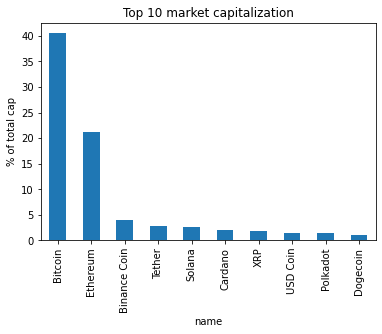

In [30]:
#Plotting the barplot with the title defined above 
ax = df['market_cap_dominance'][:10].plot.bar()
# Annotating the y axis with the label defined above
ax.set( title = 'Top 10 market capitalization' , ylabel='% of total cap');


In [31]:
# Calculating total price
df['total_volume_24h_perc'] = (df['volume_24h']/ df.volume_24h.sum()) *100
df['total_volume_24h_perc'] 

name
Bitcoin         16.226530
Ethereum        13.360839
Binance Coin     1.356637
Tether          38.332421
Solana           1.529050
                  ...    
OMG Network      0.269126
Siacoin          0.036128
Livepeer         0.021670
Ravencoin        0.022444
XDC Network      0.003795
Name: total_volume_24h_perc, Length: 100, dtype: float64

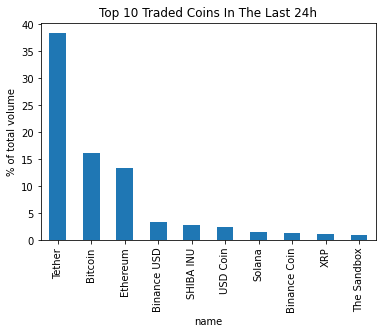

In [32]:
#Plotting the barplot with the title defined above 
ax = df['total_volume_24h_perc'].sort_values(ascending=False)[:10].plot.bar()
# Annotating the y axis with the label defined above
ax.set( title = 'Top 10 Traded Coins In The Last 24h' , ylabel='% of total volume');

#### Volatility in cryptocurrencies

The cryptocurrencies market has been spectacularly volatile since the first exchange opened.Let's explore this volatility a bit more! We will begin by selecting and plotting the 24 hours and 7 days percentage change, which we already have available.

In [33]:
# Selecting the name, volume_change_24h and volume_change_7d columns
volatility = df[['volume_change_1h', 'volume_change_24h','volume_change_7d','volume_change_30d', 'volume_change_60d','volume_change_90d']]

# Setting the index to 'name' and dropping all NaN rows 

volatility = volatility.dropna()

# Sorting the DataFrame by volume_change_24h in ascending order
volatility = volatility.sort_values(by = "volume_change_24h" , ascending = True)


# Checking the first few rows
volatility.head(10)

,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d
name,,,,,,
SHIBA INU,1.222508,-10.401927,17.083318,-35.804965,508.399061,532.931677
The Sandbox,-1.544699,-6.796773,-6.012508,207.783642,724.217745,529.908262
WAX,-0.510363,-6.402456,-24.494966,60.871453,155.697579,81.796444
Horizen,-0.815890,-6.192089,-5.382361,27.166921,50.722403,19.079407
Siacoin,-0.892767,-5.297979,12.742627,13.850236,43.611445,8.071703
Decentraland,-0.448044,-4.814430,-10.588031,39.793906,507.271506,361.958008
Zcash,-1.440653,-4.629917,-12.191917,30.341167,94.033906,43.701767
OMG Network,-1.329373,-4.093854,-4.398144,-40.614888,-40.281050,26.109984
XDC Network,0.177150,-3.927050,-18.489131,-11.146837,-32.043520,-38.868817


#### Let's plot the top 10 biggest gainers and top 10 losers in market capitalization.

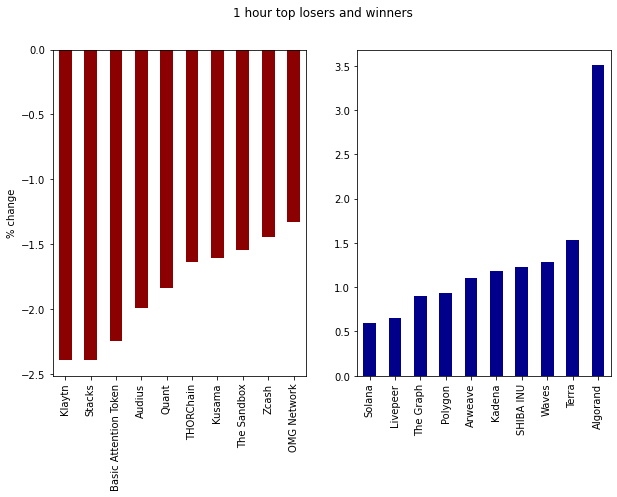

In [34]:
# Making the subplot and the figure for two side by side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Plotting with pandas the barchart for the top 10 losers
ax = (volatility.volume_change_1h.sort_values()[:10].plot.bar(color="darkred", ax=axes[0]))
# Setting the figure's main title to the text passed as parameter
fig.suptitle( "1 hour top losers and winners")
    
# Setting the ylabel to '% change'
ax.set_ylabel("% change")
ax.set_xlabel("")

# Same as above, but for the top 10 winners
ax = (volatility.volume_change_1h.sort_values()[-10:].plot.bar(color="darkblue", ax=axes[1]))
ax.set_xlabel("");


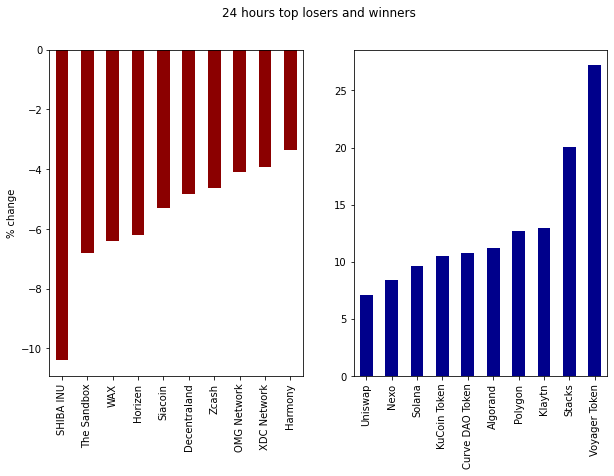

In [35]:
# Making the subplot and the figure for two side by side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Plotting with pandas the barchart for the top 10 losers
ax = (volatility.volume_change_24h[:10].plot.bar(color="darkred", ax=axes[0]))
# Setting the figure's main title to the text passed as parameter
fig.suptitle( "24 hours top losers and winners")
    
# Setting the ylabel to '% change'
ax.set_ylabel("% change")
ax.set_xlabel("")

# Same as above, but for the top 10 winners
ax = (volatility.volume_change_24h[-10:].plot.bar(color="darkblue", ax=axes[1]))
ax.set_xlabel("");

    
    

#### Lets check for  weekly 

Text(0.5, 0, '')

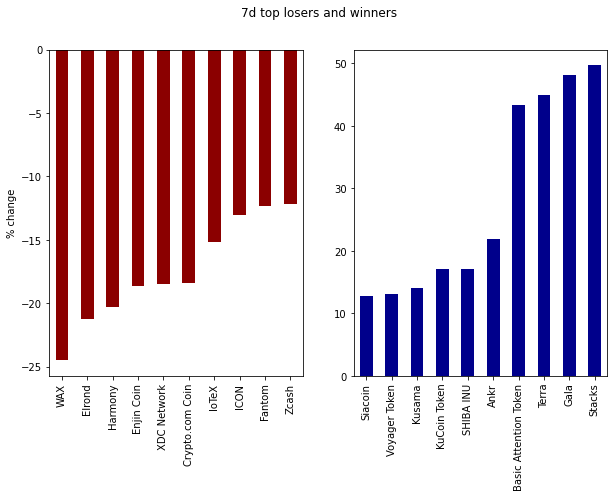

In [36]:
# Sorting the DataFrame by volume_change_24h in ascending order
volatility7d = volatility.sort_values(by = "volume_change_7d" , ascending = True)

# Making the subplot and the figure for two side by side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Plotting with pandas the barchart for the top 10 losers
ax = (volatility.volume_change_7d.sort_values()[:10].plot.bar(color="darkred", ax=axes[0]))
# Setting the figure's main title to the text passed as parameter
fig.suptitle( "7d top losers and winners")
    
# Setting the ylabel to '% change'
ax.set_ylabel("% change")
ax.set_xlabel("")

# Same as above, but for the top 10 winners
ax = (volatility.volume_change_7d.sort_values()[-10:].plot.bar(color="darkblue", ax=axes[1]))
ax.set_xlabel("")

**Top Gainers and Losers for 30 days**

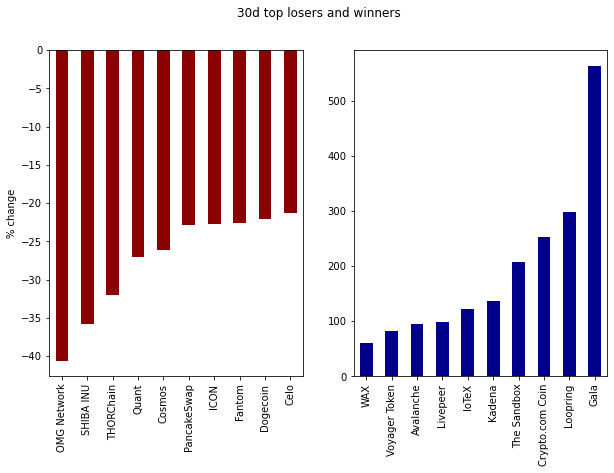

In [37]:


# Making the subplot and the figure for two side by side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Plotting with pandas the barchart for the top 10 losers
ax = (volatility.volume_change_30d.sort_values()[:10].plot.bar(color="darkred", ax=axes[0]))
# Setting the figure's main title to the text passed as parameter
fig.suptitle( "30d top losers and winners")
    
# Setting the ylabel to '% change'
ax.set_ylabel("% change")
ax.set_xlabel("")

# Same as above, but for the top 10 winners
ax = (volatility.volume_change_30d.sort_values()[-10:].plot.bar(color="darkblue", ax=axes[1]))
ax.set_xlabel("");

**Top Gainers and Losers for 60 days**

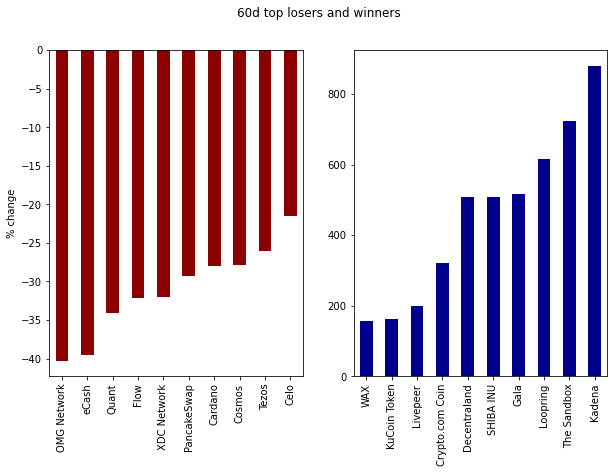

In [38]:

# Making the subplot and the figure for two side by side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Plotting with pandas the barchart for the top 10 losers
ax = (volatility.volume_change_60d.sort_values()[:10].plot.bar(color="darkred", ax=axes[0]))
# Setting the figure's main title to the text passed as parameter
fig.suptitle( "60d top losers and winners")
    
# Setting the ylabel to '% change'
ax.set_ylabel("% change")
ax.set_xlabel("")

# Same as above, but for the top 10 winners
ax = (volatility.volume_change_60d.sort_values()[-10:].plot.bar(color="darkblue", ax=axes[1]))
ax.set_xlabel("");

#### Lets check for 90days

Text(0.5, 0, '')

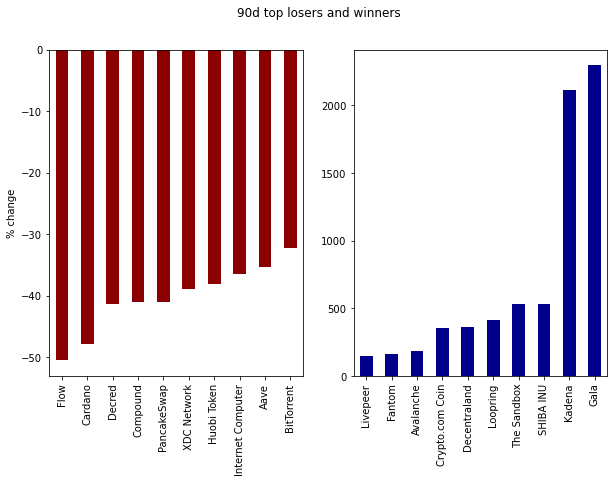

In [39]:
# Sorting the DataFrame by volume_change_24h in ascending order
volatility90d = volatility.sort_values(by = "volume_change_90d" , ascending = True)

# Making the subplot and the figure for two side by side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Plotting with pandas the barchart for the top 10 losers
ax = (volatility.volume_change_90d.sort_values()[:10].plot.bar(color="darkred", ax=axes[0]))
# Setting the figure's main title to the text passed as parameter
fig.suptitle( "90d top losers and winners")
    
# Setting the ylabel to '% change'
ax.set_ylabel("% change")
ax.set_xlabel("")

# Same as above, but for the top 10 winners
ax = (volatility.volume_change_90d.sort_values()[-10:].plot.bar(color="darkblue", ax=axes[1]))
ax.set_xlabel("")

**Looking at the Market Cap**


Market cap allows you to compare the total value of one cryptocurrency with another so you can make more informed investment decisions. Cryptocurrencies are classified by their market cap into three categories:

- Large-cap cryptocurrencies, including Bitcoin and Ethereum, have a market cap of more than ```$10 billion```. Investors consider them to be lower risk investments because they have a demonstrated track-record of growth and often have higher liquidity — meaning they can withstand a higher volume of people cashing out without the price being dramatically impacted.

- Mid-cap cryptocurrencies have market caps between ```$1 billion and $10 billion``` – they generally are considered to have more untapped potential upside but also higher risk. 

- Small-cap cryptocurrencies have a market cap of less than ```$1 billion``` and are most susceptible to dramatic swings based on market sentiment. 

<AxesSubplot:>

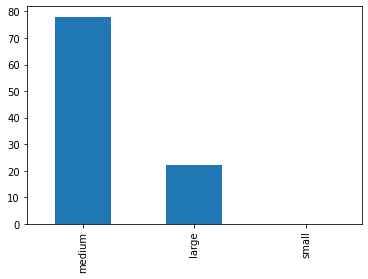

In [40]:
bins = [0,1000000000,10000000000,5000000000000]
labels = ['small','medium','large']
df['cap'] = pd.cut(df['market_cap'],bins,labels=labels)
df['cap'].value_counts().plot(kind='bar')

In [41]:
df[df['cap']=='large'].index

Index(['Bitcoin', 'Ethereum', 'Binance Coin', 'Tether', 'Solana', 'Cardano',
       'XRP', 'USD Coin', 'Polkadot', 'Dogecoin', 'Avalanche', 'SHIBA INU',
       'Terra', 'Crypto.com Coin', 'Litecoin', 'Wrapped Bitcoin', 'Polygon',
       'Uniswap', 'Binance USD', 'Algorand', 'Chainlink', 'Bitcoin Cash'],
      dtype='object', name='name')

In [42]:
df[df['cap']=='medium'].index

Index(['Axie Infinity', 'Decentraland', 'Stellar', 'VeChain', 'TerraUSD',
       'Internet Computer', 'Elrond', 'FTX Token', 'Filecoin', 'TRON', 'THETA',
       'Dai', 'Ethereum Classic', 'Hedera', 'Cosmos', 'Bitcoin BEP2',
       'The Sandbox', 'Fantom', 'NEAR Protocol', 'Tezos', 'The Graph', 'Gala',
       'Monero', 'Helium', 'Klaytn', 'Flow', 'EOS', 'IOTA', 'Stacks',
       'Loopring', 'Aave', 'PancakeSwap', 'UNUS SED LEO', 'Kusama',
       'BitTorrent', 'Maker', 'Enjin Coin', 'Zcash', 'THORChain', 'Harmony',
       'Bitcoin SV', 'eCash', 'Neo', 'Kadena', 'Chiliz', 'Amp', 'Quant',
       'Waves', 'Basic Attention Token', 'Curve DAO Token', 'KuCoin Token',
       'Holo', 'Arweave', 'Dash', 'Celo', 'Compound', 'Theta Fuel', 'Nexo',
       'Qtum', 'NEM', 'Huobi Token', 'Immutable X', 'OKB', 'IoTeX', 'Decred',
       'Mina', 'Voyager Token', 'Horizen', 'Audius', 'TrueUSD', 'WAX', 'Ankr',
       'ICON', 'OMG Network', 'Siacoin', 'Livepeer', 'Ravencoin',
       'XDC Network'],
      dtype

In [43]:
df.drop(['date_added','last_updated'],axis=1,inplace=True)

In [44]:
df.groupby('cap').mean()[['volume_24h','volume_change_1h','volume_change_24h','volume_change_7d','volume_change_30d','volume_change_60d','volume_change_90d']]

,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d
cap,,,,,,,
small,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medium,3.411119e+08,-0.491924,0.944236,-0.121873,18.516637,66.444086,86.630031
large,9.029884e+09,0.130803,3.120579,3.495788,12.855398,55.537138,59.297458


we see that the medium cap coins are performing better in every category over the past 90 days.

<AxesSubplot:>

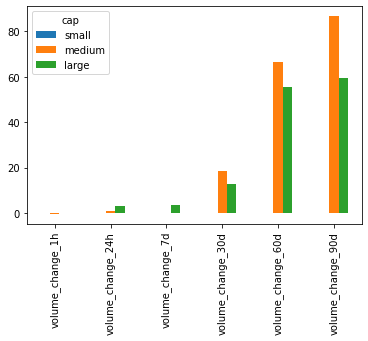

In [45]:
df.groupby('cap').mean()[['volume_change_1h','volume_change_24h','volume_change_7d','volume_change_30d','volume_change_60d','volume_change_90d']].T.plot(kind='bar')

#### Rolling Mean (Moving Average) & Bollinger bands — to determine a trend and volatilty 

A simple moving average, also called a rolling or running average is formed by computing the average price of a security over a specific number of periods. Most moving averages are based on closing prices; for example, a 5-day simple moving average is the five-day sum of closing prices divided by five. As its name implies, a moving average is an average that moves. Old data is dropped as new data becomes available, causing the average to move along the time scale

Bollinger bands are a type of technical indicator that allows traders to analyze the volatility of a stock and whether the price is high or low on a relative basis. The top band is typically two standard deviations above the SMA and the bottom band is typically two standard deviations below the SMA.

The easiest way to calculate the simple moving average is by using the pandas.Series.rolling method. This method provides rolling windows over the data.

In this analysis we will be using a window of 30 for the past 30 days of bitcoin and 2 standard deviations for the bollinger bands.

We will be using the Coingecko API as we are not able to get historical data from CoinMarketCap.

In [46]:
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()


In [47]:
bitcoin_price = cg.get_coin_market_chart_by_id('bitcoin','usd','30')
bit_time = [i[0] for i in bitcoin_price['prices']]
bit_prices = [i[1] for i in bitcoin_price['prices']]
bit_market_caps = [i[1] for i in bitcoin_price['market_caps']]
bit_total_volumes = [i[1] for i in bitcoin_price['total_volumes']]

In [48]:
cg_df = pd.DataFrame({'time':bit_time,'price':bit_prices,'market_caps':bit_market_caps,'total_volumes':bit_total_volumes})
cg_df['time'] = pd.to_datetime((cg_df['time']/1000),unit='s')

In [49]:
cg_df = cg_df.set_index('time')

In [50]:
cg_df['ma_rolling_30-Day'] = cg_df.price.rolling(window=30).mean()
cg_df['std'] = cg_df.price.rolling(window=30).std()
cg_df['upper'] = cg_df['ma_rolling_30-Day'] + 2*cg_df['std']
cg_df['lower'] = cg_df['ma_rolling_30-Day']- 2*cg_df['std']
cg_df

,price,market_caps,total_volumes,ma_rolling_30-Day,std,upper,lower
time,,,,,,,
2021-11-01 12:00:06.276999936,61947.472150,1.169581e+12,3.610027e+10,NaN,NaN,NaN,NaN
2021-11-01 13:03:08.668999936,61921.807870,1.167355e+12,3.644397e+10,NaN,NaN,NaN,NaN
2021-11-01 14:08:46.400999936,61993.752164,1.169250e+12,3.608881e+10,NaN,NaN,NaN,NaN
2021-11-01 15:00:12.424000000,61482.256097,1.169250e+12,3.558004e+10,NaN,NaN,NaN,NaN
2021-11-01 16:08:58.680999936,61580.793138,1.161374e+12,3.571376e+10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-12-01 08:02:42.257999872,57231.741157,1.080982e+12,3.542580e+10,57311.970142,502.880909,58317.731960,56306.208324
2021-12-01 09:03:35.005000192,56749.098100,1.071869e+12,3.562407e+10,57290.806920,513.002923,58316.812766,56264.801073
2021-12-01 10:00:42.624000000,57109.274155,1.077374e+12,3.481165e+10,57297.285142,509.306417,58315.897975,56278.672308


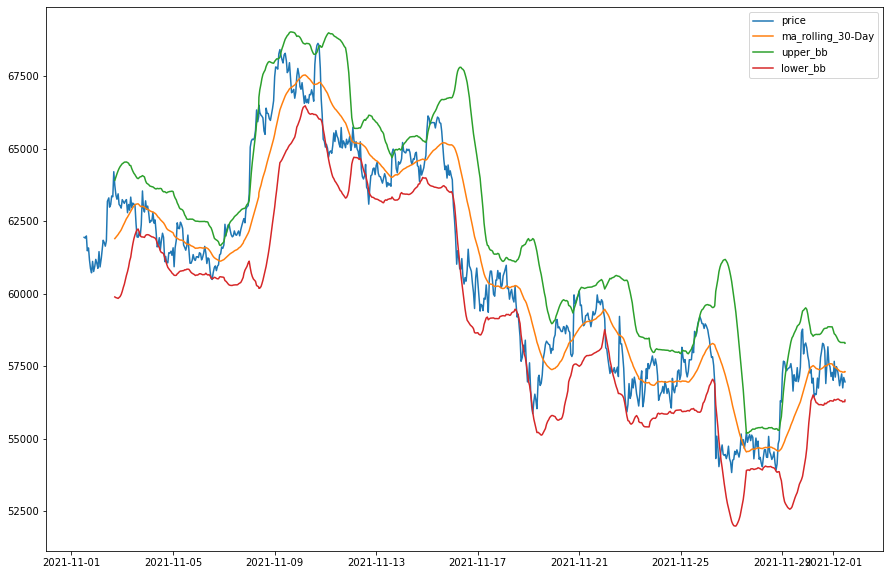

In [51]:
plt.figure(figsize=(15,10))

plt.plot(cg_df[['price','ma_rolling_30-Day','upper','lower']])
plt.legend(['price','ma_rolling_30-Day','upper_bb','lower_bb']);

In [52]:
df1

,name,date_added,cmc_rank,total_supply,last_updated,price,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d,market_cap,market_cap_dominance,id,description,logo,urls,twitter_username
0,Bitcoin,2013-04-28,1,1.888795e+07,2021-12-01 11:17:02,56889.203959,3.655256e+10,-0.320473,-0.283872,0.680937,-8.471585,19.657813,14.141988,1.074520e+12,40.5206,1,"Bitcoin (BTC) is a cryptocurrency . Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 18,887,950. The last known price of Bitcoin is 57,020.23008684 USD and is down -0.20 over the last 24 hours. It is currently trading on 8310 active market(s) with $36,589,636,176.79 traded over the last 24 hours. More information can be found at https://bitcoin.org/.",,https://bitcoin.org/,
1,Ethereum,2015-08-07,2,1.185616e+08,2021-12-01 11:17:03,4714.449411,3.009718e+10,-0.262828,5.005474,10.312498,8.613902,43.928827,25.821647,5.589528e+11,21.1052,1027,"Ethereum (ETH) is a cryptocurrency . Users are able to generate ETH through the process of mining. Ethereum has a current supply of 118,561,627.749. The last known price of Ethereum is 4,729.60021807 USD and is up 5.19 over the last 24 hours. It is currently trading on 4672 active market(s) with $30,170,508,177.33 traded over the last 24 hours. More information can be found at https://www.ethereum.org/.",,https://www.ethereum.org/,ethereum
2,Binance Coin,2017-07-25,3,1.668011e+08,2021-12-01 11:16:14,639.154939,3.056017e+09,-0.800184,3.541923,8.601267,18.608157,51.825271,30.454581,1.066118e+11,4.0255,1839,"Binance Coin (BNB) is a cryptocurrency . Binance Coin has a current supply of 166,801,148. The last known price of Binance Coin is 640.63847579 USD and is up 3.39 over the last 24 hours. It is currently trading on 558 active market(s) with $3,060,009,993.21 traded over the last 24 hours. More information can be found at https://www.binance.com/.",,https://www.binance.com/,binance
3,Tether,2015-02-25,4,7.635200e+10,2021-12-01 11:16:13,1.001195,8.634921e+10,0.048000,0.047348,0.115300,0.086172,0.090947,0.079256,7.366628e+10,2.7805,825,"Tether (USDT) is a cryptocurrency and operates on the Ethereum platform. Tether has a current supply of 76,351,995,265.76913 with 73,578,322,706.64124 in circulation. The last known price of Tether is 1.00116925 USD and is up 0.07 over the last 24 hours. It is currently trading on 20113 active market(s) with $86,288,942,959.29 traded over the last 24 hours. More information can be found at https://tether.to.",,https://tether.to,tether_to
4,Solana,2020-04-10,5,5.102060e+08,2021-12-01 11:17:06,222.585300,3.444402e+09,0.596154,9.658946,3.286683,8.090880,41.023806,93.689039,6.808058e+10,2.5697,5426,"Solana (SOL) is a cryptocurrency launched in 2020. Solana has a current supply of 510,206,029.20246863 with 305,862,885.1340773 in circulation. The last known price of Solana is 223.18514492 USD and is up 9.81 over the last 24 hours. It is currently trading on 190 active market(s) with $3,443,956,326.36 traded over the last 24 hours. More information can be found at https://solana.com.",,https://solana.com,solana
5,Cardano,2017-10-01,6,3.371928e+10,2021-12-01 11:16:12,1.585905,1.802792e+09,-0.352147,0.905175,-5.329287,-20.261525,-28.038385,-47.911685,5.283166e+10,1.9941,2010,"Cardano (ADA) is a cryptocurrency launched in 2017. Users are able to generate ADA through the process of mining. Cardano has a current supply of 33,719,282,563.077 with 33,313,246,914.729 in circulation. The last known price of Cardano is 1.58753695 USD and is up 0.56 over the last 24 hours. It is currently trading on 298 active market(s) with $1,805,202,197.49 traded over the last 24 hours. More information can be found at https://www.cardano.org.",,https://www.cardano.org,cardano
6,XRP,2013-08-04,7,9.999015e+10,2021-12-01 11:17:03,1.000521,2.791162e+09,-0.429034,1.332941,-3.260485,-8.651193,-1.324830,-21.537455,4.718356e+10,1.7809,52,"XRP (XRP) is 